Mean Squared Error: 10089009300.89
R-squared Score: 0.92

Feature Importance:
                        Feature    Coefficient
0              Avg. Area Income  231741.876652
1           Avg. Area House Age  163580.776566
4               Area Population  152235.900097
2     Avg. Area Number of Rooms  120724.771387
3  Avg. Area Number of Bedrooms    2992.449135


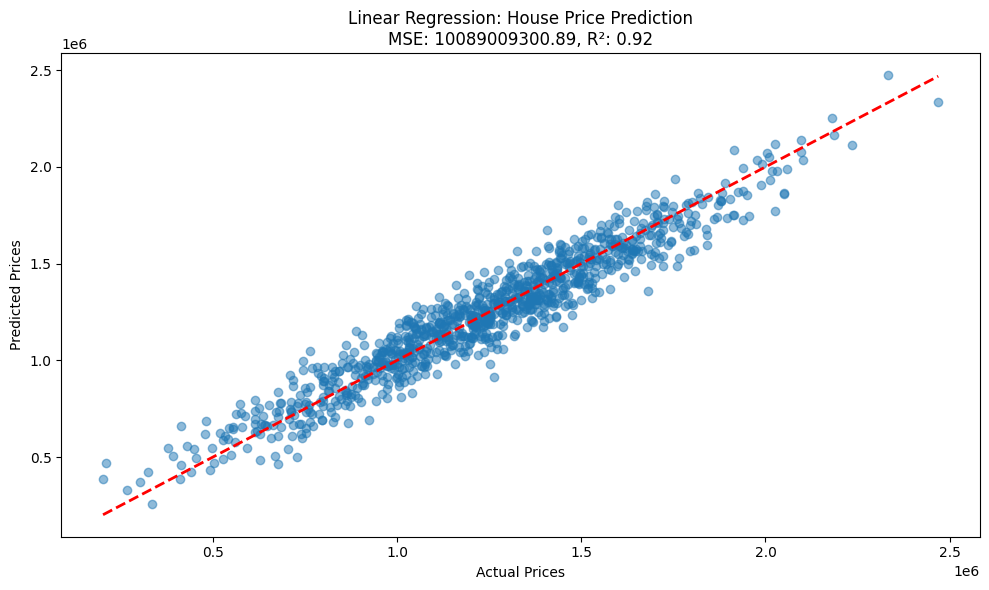

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
url = "https://raw.githubusercontent.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction/master/USA_Housing.csv"
df = pd.read_csv(url)

# Prepare features and target
X = df.drop(['Price', 'Address'], axis=1)
y = df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('Coefficient', ascending=False))

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Linear Regression: House Price Prediction\nMSE: {mse:.2f}, R²: {r2:.2f}')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.tight_layout()
plt.show()